<h1><center><font face = 'Cambria'>Portfolio Project - eBay Shill Bidding Classification</font></center></h1>
<h2><center><font face = 'Cambria'>Michael Kenny - https://kennymichael.github.io/Michael-Kenny-Data-Analysis-Portfolio/</font></center></h2>

<h1><font face = 'Cambria'>Scenario:</font></h1>

<font face = 'Cambria'><font size="+0.5">Online retailer, eBay is providing an option of bidding to their customers globally. Bidding is employed to find the real price of items in the market based on the demand. The price offered by anyone participating in this process is termed as a 'bid'. A dataset is available for the bidding of customers.

The goal of this project is to prepare the data for use in classification or clustering algorithms to predict the bids in the future.
</font>

<h1><font face = 'Cambria'>Goals:</font></h1>

<font face = 'Cambria'><font size="+0.5">Characterization of the data set: size; number of attributes; has/does not have missing values, number of observations etc.

Application of Data preparation/evaluation methods and exploratory data analysis visualizations.

Showcasing feature encoding, scaling and feature engineering as required, detailing the decisions and rationale behind chosen techniques.

Employing both Linear Discriminant Analysis and Principal Component Analysis for Dimensionality Reduction, and comparing the separation of classes through visualization.
</font>

<h2><font face = 'Cambria'>Importing Libraries</font></h2>

In [178]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import Bunch
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import r2_score 

<font face = 'Cambria'><font size="+0.5">The first step is to import our dataset using pandas, and save it to the variable bidding_df as a pandas dataframe.</font>

In [179]:
bidding_df = pd.read_csv('Shill Bidding Dataset.csv')

<font face = 'Cambria'><font size="+0.5">The data is sourced from the UCI machine learning repository (“Shill Bidding Dataset Data Set”). Each row in the dataset describes an individual bidder in individual eBay auctions, the data for which has been preprocessed and labelled. The target variable in the dataset is 'Class', which indicates whether a bid is flagged as fraudulent or not. The repository includes the following attribute information on the dataset:</font>


<font face = 'Cambria'><font size="+0.5">
- Record ID: Unique identifier of a record in the dataset.

- Auction ID: Unique identifier of an auction.

- Bidder ID: Unique identifier of a bidder.

- Bidder Tendency: A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.

- Bidding Ratio: A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.

- Successive Outbidding: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.

- Last Bidding: A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction.

- Auction Bids: Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.

- Auction Starting Price: a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.

- Early Bidding: A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users.

- Winning Ratio: A shill bidder competes in many auctions but hardly wins any auctions.

- Auction Duration: How long an auction lasted.
- Class: 0 for normal behaviour bidding; 1 for otherwise.
</font>

<font face = 'Cambria'><font size="+0.5">With a clear understanding of the content of each feature, we can begin to perform exploratory analysis on our dataset. The info, head and tail methods will provide a quick overview of the layout of the data.</font>

In [180]:
bidding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


<font face = 'Cambria'><font size="+0.5">From the info method we can see that there are no null values in the data. All of our data is numeric, aside from the Bidder_ID column. There are a total of 6321 observations in the dataframe, and 13 features.</font>

In [181]:
bidding_df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [182]:
bidding_df.tail()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0
6320,15144,2481,a***l,0.016393,0.043478,0.0,0.340351,0.217391,0.993593,0.340351,0.000000,7,0


<font face = 'Cambria'><font size="+0.5">With the head and tail methods, we can see how each auction is represented in the dataframe. The first three features ('Record_ID', 'Auction_ID', 'Bidder_ID') consist of identification data. We can see that some auctions are represented multiple times in the dataset. To see how many unique auctions are in the dataframe, we can have a look at the value counts for each ID.</font>

In [183]:
bidding_df.Auction_ID.value_counts()

589     26
1872    26
658     24
256     24
1623    23
        ..
548      1
1971     1
1756     1
458      1
2329     1
Name: Auction_ID, Length: 807, dtype: int64

In [184]:
bidding_df.Bidder_ID.value_counts()

a***a    112
n***t     85
e***e     67
i***a     50
r***r     49
        ... 
i***8      1
.***0      1
9***2      1
1***b      1
4***g      1
Name: Bidder_ID, Length: 1054, dtype: int64

<font face = 'Cambria'><font size="+0.5">From the value counts method, we can see that the dataset contains 807 unique auctions, and 1054 unique bidders.

The next four features ('Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding') describe the bidding behaviour of the auction participant in that auction.</font>

In [185]:
bidding_df.Bidder_Tendency.describe()

count    6321.000000
mean        0.142541
std         0.197084
min         0.000000
25%         0.027027
50%         0.062500
75%         0.166667
max         1.000000
Name: Bidder_Tendency, dtype: float64

In [186]:
bidding_df.Bidding_Ratio.describe()

count    6321.000000
mean        0.127670
std         0.131530
min         0.011765
25%         0.043478
50%         0.083333
75%         0.166667
max         1.000000
Name: Bidding_Ratio, dtype: float64

In [187]:
bidding_df.Successive_Outbidding.describe()

count    6321.000000
mean        0.103781
std         0.279698
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Successive_Outbidding, dtype: float64

In [188]:
bidding_df.Last_Bidding.describe()

count    6321.000000
mean        0.463119
std         0.380097
min         0.000000
25%         0.047928
50%         0.440937
75%         0.860363
max         0.999900
Name: Last_Bidding, dtype: float64

<font face = 'Cambria'><font size="+0.5">Each of the bidding behaviour characteristics are represented as a score in the 0-1 range.

The next five features describe the auction, ('Auction_Bids', 'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio', 'Auction_Duration'). The final feature is the target variable 'Class', which indicates with a 0 or 1 whether a bid is labelled as fraudulent or not.

For our purpose finding a signal in the data, and preparing it for use in machine learning algorithms, we can drop the three ID columns. To prepare the data for use in classifying or clustering algorithms, the ID's in the this set of training data will not provide the algorithms any predictive power when applied to unseen data.

Our goal is to analyse the behaviour of bidders, with respect to the target 'class' variable. In this case the ID's of do not tell us anything about the bidding behaviour that we are looking to detect, and so we can drop them from our dataframe.</font>

In [189]:
bidding_df.drop(columns = ['Record_ID', 'Auction_ID', 'Bidder_ID'], inplace=True)
bidding_df

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


<font face = 'Cambria'><font size="+0.5">We are now left with the bidder behaviour and auction data to explore. The first step will be to visualize the data. A histogram of each feature in the dataset will give us an idea of the spread of elements in each column.</font>

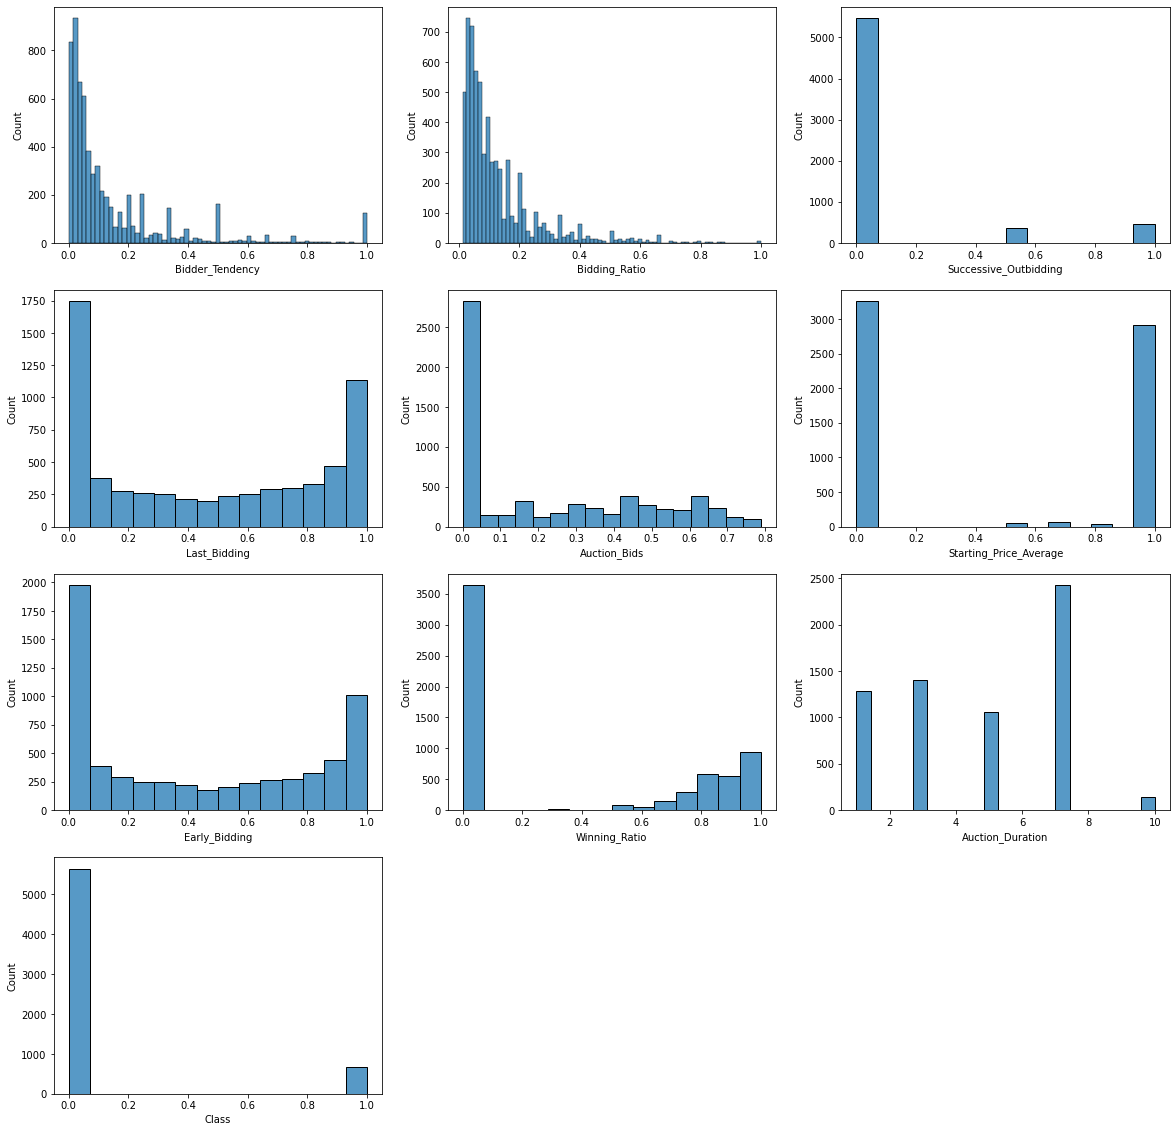

In [190]:
plt.figure(figsize=(20,20))
i = 0

columns = ['Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio', 'Auction_Duration', 'Class']
for col in columns:
  i = i + 1
  plt.subplot(4, 3, i)
  sns.histplot(data = bidding_df[col], legend=True)

plt.show()

<font face = 'Cambria'><font size="+0.5">The histograms show a number of the variables that contain mostly elements skewed to the extremities, with a dip in the middle. Features like 'Bidder_Tendency' and 'Bidding_Ratio' are heavily skewed towards the left, with most elements being in the 0 - 0.2 range. 

There is a range of variability among the features, 'Bidder_Tendency' and 'Bidding_Ratio' have a high degree of variability. 'Last_Bidding', 'Auction_Bids and 'Early_Bidding' are in the mid-range of variability, while 'Winning_Ratio', 'Auction_Duration', and 'Starting_Price_Average' are in the lower range of variability. This has an effect on the relative statistical significance between the features, and on a classifiers reproducibility when trained on our data. 

From a 2010 paper titled 'Consequences of Variability in Classifier Performance Estimates', the authors write 'We demonstrate that under the prevailing evaluation methodology (relatively few iterations of cross-validation), the results of classifier comparisons are overly sensitive to the ordering of the data.' (Raeder and Nitesh). This is a notable observation for any future classification being done with our data.


The characteristic with the least amount of variability is the 'Class' characteristic. This histogram shows that the vast majority of our data is made up of normal bids, rather than anomalous bids.</font>

In [191]:
bidding_df.Class.value_counts()

0    5646
1     675
Name: Class, dtype: int64

<font face = 'Cambria'><font size="+0.5">By looking at the value counts we can see the difference is 5646 normal bids to 675 anomalous bids. To visualize the difference between the two classes we can draw scatter plots of each feature and colour code the dots as normal and anomalous bids.</font>

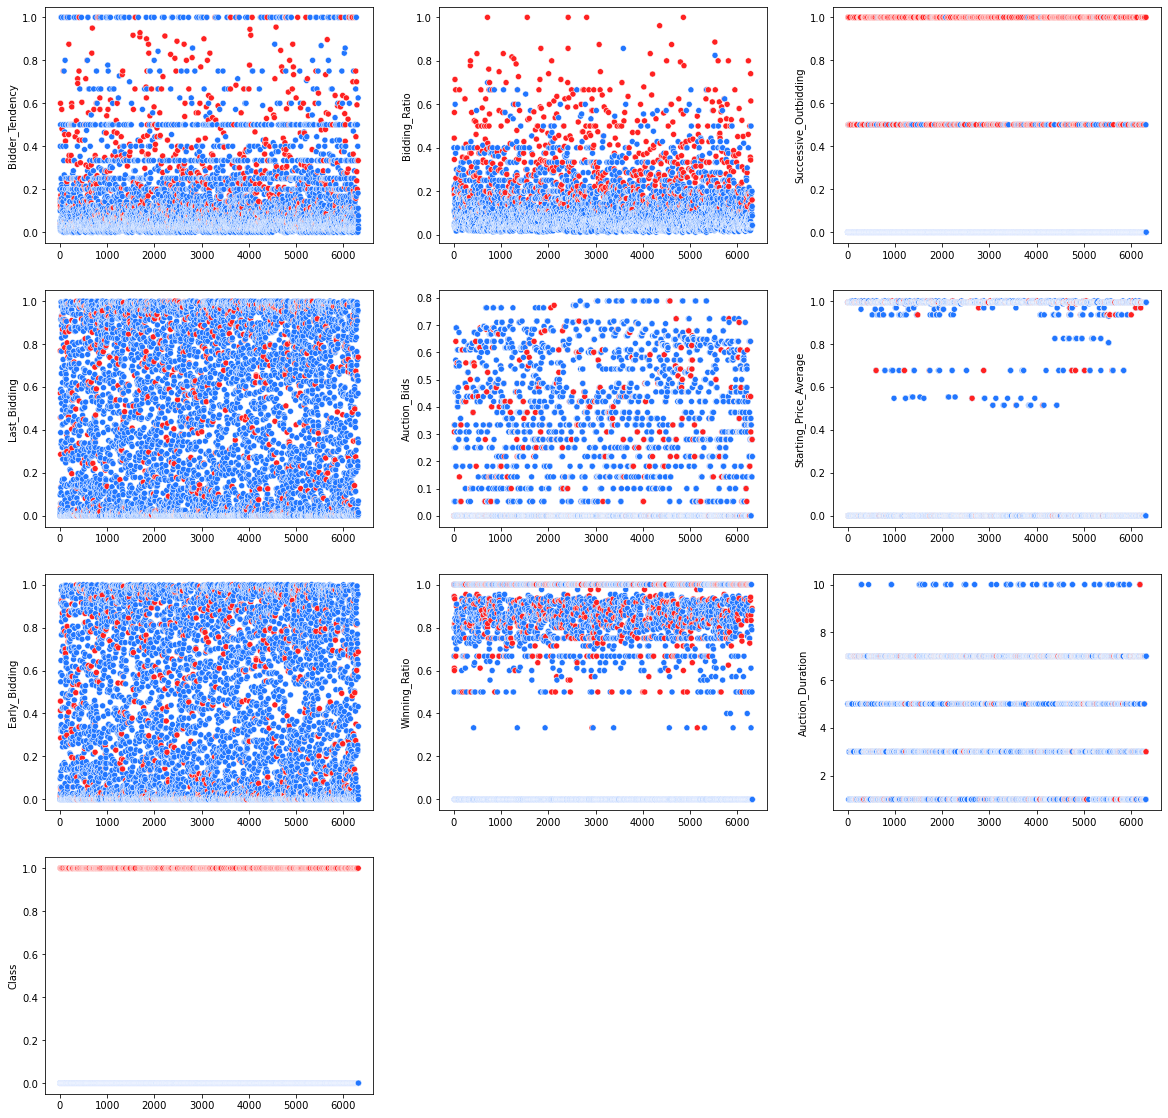

In [192]:
plt.figure(figsize=(20,20))
i = 0

columns = ['Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio', 'Auction_Duration', 'Class']
for col in columns:
  i = i + 1
  plt.subplot(4, 3, i)
  colour = ['#ff2121' if y == 1 else '#2176ff' for y in bidding_df.Class]
  sns.scatterplot(data = bidding_df[col], legend=True, c=colour, edgecolors='#000000')

plt.show()

<font face = 'Cambria'><font size="+0.5">From our scatter plots we can see that no one variable provides enough information to differentiate between the two classes. At first glance, each feature plot has a relatively even distribution of each class. The feature with the biggest difference appears to be 'Successive_Outbidding', with only 3 different values and a clear representation of anomalous bids with a score of 1. We can investigate this further by filtering our dataset using succesive outbidding and class as conditions.</font></h2>

In [193]:
bidding_df.Successive_Outbidding.value_counts()

0.0    5478
1.0     469
0.5     374
Name: Successive_Outbidding, dtype: int64

In [194]:
mask1 = bidding_df.Class == 1
mask2 = bidding_df.Successive_Outbidding > 0.5
bidding_df.loc[mask1 & mask2]

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
7,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,7,1
8,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,7,1
10,0.600000,0.562500,1.0,0.457631,0.000000,0.000000,0.457474,0.600000,7,1
13,0.041322,0.208333,1.0,0.286045,0.250000,0.000000,0.286025,0.818182,7,1
18,0.172414,0.185185,1.0,0.133783,0.333333,0.993528,0.048748,0.933333,7,1
...,...,...,...,...,...,...,...,...,...,...
6280,0.700000,0.140000,1.0,0.736641,0.640000,0.993593,0.736611,1.000000,5,1
6284,0.239130,0.343750,1.0,0.646898,0.437500,0.993593,0.600521,0.941176,1,1
6285,0.281690,0.740741,1.0,0.651391,0.333333,0.993593,0.651339,1.000000,7,1
6289,0.592593,0.615385,1.0,0.909158,0.307692,0.000000,0.003395,0.857143,7,1


In [195]:
sb_percent = round(len(bidding_df.loc[mask1 & mask2]) / len(bidding_df.loc[bidding_df.Class == 1]),3) * 100
print(f'{sb_percent}% of all anomalous bids have a succesive outbidding score of 1.0')

66.8% of all anomalous bids have a succesive outbidding score of 1.0


<font face = 'Cambria'><font size="+0.5">This is a useful insight, as a great amount of classification power can be captured in the successive outbidding feature.

'Bidding_Ratio' is another scatter plot with a visible cluster of anomalous bids, with most data-points in the upper 0.4 - 1.0 range being classed as anomalous. If we look at the histogram for bidding ratio, we can see that the majority of the data lies within the lower 0 - 0.2 range. By creating another mask filtering for the condition that bidding ratio is greater than 0.2, we can investigate this relationship further.</font></h2>

<AxesSubplot:xlabel='Bidding_Ratio', ylabel='Count'>

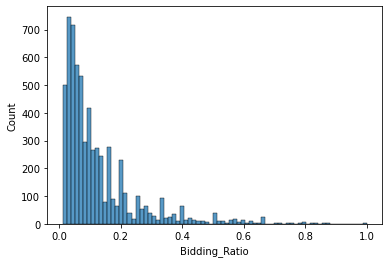

In [196]:
sns.histplot(data=bidding_df.Bidding_Ratio)

In [197]:
mask3 = bidding_df.Bidding_Ratio > 0.2
bidding_df.loc[mask1 & mask3]

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
7,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,7,1
9,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,7,1
10,0.600000,0.562500,1.0,0.457631,0.000000,0.000000,0.457474,0.600000,7,1
13,0.041322,0.208333,1.0,0.286045,0.250000,0.000000,0.286025,0.818182,7,1
23,0.111111,0.714286,0.5,0.055501,0.000000,0.000000,0.053763,0.818182,7,1
...,...,...,...,...,...,...,...,...,...,...
6266,0.157895,0.500000,0.5,0.673553,0.000000,0.000000,0.673403,0.727273,1,1
6278,0.086957,0.357143,1.0,0.985273,0.357143,0.993593,0.813142,0.926829,7,1
6284,0.239130,0.343750,1.0,0.646898,0.437500,0.993593,0.600521,0.941176,1,1
6285,0.281690,0.740741,1.0,0.651391,0.333333,0.993593,0.651339,1.000000,7,1


In [198]:
br_percent1 = round(len(bidding_df.loc[mask3]) / len(bidding_df),3) * 100
print(f'{br_percent1}% of all total bids have a bidding ratio score of more than 0.2.')

16.3% of all total bids have a bidding ratio score of more than 0.2.


In [199]:
br_percent2 = round(len(bidding_df.loc[mask1 & mask3]) / len(bidding_df.loc[bidding_df.Class == 1]),3) * 100
print(f'{br_percent2}% of all anomalous bids have a bidding ratio score of more than 0.2.')

71.6% of all anomalous bids have a bidding ratio score of more than 0.2.


<font face = 'Cambria'><font size="+0.5">Here we can see another useful classification insight with bidding ratio. Of all bids, a minority 16.3% have a bidding ratio of more than 0.2. However, 71.6% of anomalous bids have a score of 0.2. This is a statistically significant difference between anomalous bids and the population of all bids, and can be a useful indicator when classifying.

Bidder tendency is another feature with some clear separation between the classes in the upper range, except for a line of outliers at the 1.0 mark classified as normal. In conclusion there are some indicators among the features as to the class variable, but not enough in any one variable to distinguish between normal and anomalous bids.</font></h2>

<h2><font face = 'Cambria'>PCA for Dimensionality Reduction.</font></h2>

<font face = 'Cambria'><font size="+0.5">From these visualizations we can gather that some features contain more information regarding the target variable than others. To further distil our data, we can apply dimensionality-reduction techniques to try to simplify our data. The first dimensionality-reduction technique we are going to implement is principal component analysis (PCA).

PCA aims to maximise variance in our data, to determine what principal components contain the most information about the signal in our data. Once we know what the principal components are, we can drop the components that contain the least amount of information, reducing the total number of dimensions. Before we can implement PCA we must first examine the variance in our dataset.</font></h2>


In [200]:
df_mean = round(bidding_df.mean(), 2)
df_mean_max = df_mean.max()
df_mean_min = df_mean.min()
df_mean_range = round(df_mean_max - df_mean_min, 2)
print(f'The mean values for each column in our dataframe have a range of {df_mean_range} from {df_mean_min} to {df_mean_max}.')

The mean values for each column in our dataframe have a range of 4.52 from 0.1 to 4.62.


<font face = 'Cambria'><font size="+0.5">The variance in our data is 4.52, which is not too high. However we can see from our feature histograms that all bar one features are comprised of elements within the 0-1 range. 'Auction_Duration' is the only feature whose elements do not fit within this range.

Before we can implement principal component analysis, we will need to standardize the 'Auction_Duration' feature, or else it will skew the results of the PCA. To do so we can apply a min-max scaler function to the feature, to transform the data to be within the range of 0-1.</font></h2>

In [201]:
bidding_df.Auction_Duration

0       5
1       5
2       5
3       5
4       7
       ..
6316    3
6317    7
6318    7
6319    7
6320    7
Name: Auction_Duration, Length: 6321, dtype: int64

In [202]:
min_max = MinMaxScaler(feature_range=(0,1))
bidding_df['Auction_Duration'] = min_max.fit_transform(bidding_df[['Auction_Duration']])
bidding_df.Auction_Duration

0       0.444444
1       0.444444
2       0.444444
3       0.444444
4       0.666667
          ...   
6316    0.222222
6317    0.666667
6318    0.666667
6319    0.666667
6320    0.666667
Name: Auction_Duration, Length: 6321, dtype: float64

In [203]:
bidding_df

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,0.444444,0
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,0.444444,0
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,0.444444,0
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,0.444444,0
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0.666667,0
...,...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,0.222222,1
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,0.666667,0
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,0.666667,0
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,0.666667,0


In [204]:
df_mean = round(bidding_df.mean(), 2)
df_mean_max = df_mean.max()
df_mean_min = df_mean.min()
df_mean_range = round(df_mean_max - df_mean_min, 2)
print(f'The mean values for each column in our dataframe have a range of {df_mean_range} from {df_mean_min} to {df_mean_max}.')

The mean values for each column in our dataframe have a range of 0.37 from 0.1 to 0.47.


<font face = 'Cambria'><font size="+0.5">By looking at the variance in our data again, we can see that the variance is now only 0.37. By scaling the 'Auction_Duration' feature we have retained the information, while feature engineering our data to better work with the principle component analysis algorithm.</font></h2>

<font face = 'Cambria'><font size="+0.5">Since the 'Class' feature is our target variable, we can drop this from our dataframe before applying PCA.</font></h2>

In [205]:
Class = bidding_df.Class
bidding_df.drop(columns=['Class'], inplace=True)
bidding_df

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,0.444444
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,0.444444
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,0.444444
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,0.444444
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0.666667
...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,0.222222
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,0.666667
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,0.666667
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,0.666667


<font face = 'Cambria'><font size="+0.5">With our dataframe prepared, we can now create and implement our principal component algorithm. To do so we are using the Scikit-learn PCA module (scikit-learn developers). The PCA algorithm is first fit to our data, and then we can examine the attributes for insights on the results. The first attribute to look at is the explained variance ratio, which returns the percentage of variance explained by each component. We can then visualize the relative explained variance with a histogram.</font></h2>

In [206]:
pca = PCA().fit(bidding_df)
variance = pca.explained_variance_ratio_
variance

array([0.39157562, 0.22591338, 0.16852933, 0.07621176, 0.06264657,
       0.03300072, 0.02912981, 0.0078176 , 0.00517522])

Text(0.5, 1.0, "Explained Variance Ratio of Bidding Dataset's Principal Components")

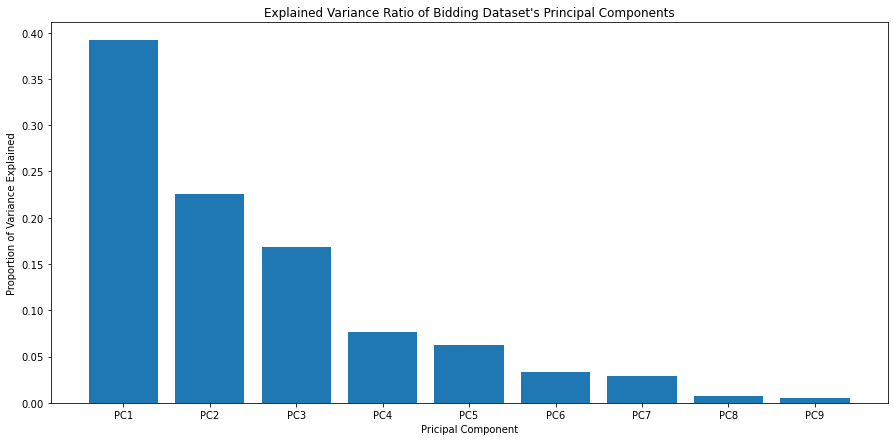

In [207]:
plt.figure(figsize=(15,7)) # plotting graph of principle components variance
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
plt.bar(labels,variance)
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Explained Variance Ratio of Bidding Dataset\'s Principal Components')

<font face = 'Cambria'><font size="+0.5">PCA works by capturing the most variance within the first few components. As we can see from the explained variance ratio histogram, the first component accounts for the most variance at 39%. The second component accounts for 23% of the variance, and each successive component accounts for less variance down to the final two components that each account for <1%.

With this, we can find the minimum number of components required to retain 95% of the variance. This will reduce the likelihood of suffering the curse of dimensionality and have more effective classification algorithms, while still retaining 95% of the signal which should be a high enough proportion to effectively classify the data. To do so we will sum the explained variance of the components together starting with the first component, until the cumulative sum is greater than 95%. We will then count the number of components required to reach that sum.</font></h2>

In [208]:
percent_variance = 0.95
i = 0
while ( (np.cumsum(pca.explained_variance_ratio_)[i]) <= percent_variance):
        i += 1

min_features = i + 1 # adding 1 to minimum features as 0 is index
print(f'The minimum number of feature components required to keep 95% of the variance is {min_features} features.')

print(f'{min_features} feature retains {round((np.cumsum(pca.explained_variance_ratio_)[i]), 3)}% of the variance in our original dataset.')

The minimum number of feature components required to keep 95% of the variance is 6 features.
6 feature retains 0.958% of the variance in our original dataset.


<font face = 'Cambria'><font size="+0.5">The results of our PCA can now be used to create a new dataframe.</font></h2>

In [209]:
pca = PCA().fit(bidding_df)
pca_df = pca.transform(bidding_df)
pca_df = pd.DataFrame(pca_df)
pca_df

,0,1,2,3,4,5,6,7,8
0,-0.269290,-0.272691,0.729656,-0.044915,-0.298888,-0.060605,0.283664,0.112007,0.192038
1,-0.334317,-0.126619,0.807153,-0.067090,-0.487222,-0.170473,0.121056,-0.015600,0.030750
2,-0.361872,-0.087766,0.857223,-0.064703,-0.477186,-0.067269,0.161040,-0.026084,0.021683
3,-0.275823,-0.007718,0.793840,-0.067597,-0.494572,-0.103589,0.146966,-0.023392,0.024535
4,-0.810817,-0.206667,-0.045012,0.259981,-0.107263,-0.059759,0.023748,0.022916,0.068690
...,...,...,...,...,...,...,...,...,...
6316,0.386691,0.733866,0.748611,-0.120633,0.451794,-0.189659,0.077891,-0.148721,-0.167067
6317,-0.251035,-0.218216,0.809132,0.177911,-0.461083,-0.094608,-0.031031,-0.035541,0.003644
6318,0.062784,-0.792581,0.373761,0.213772,-0.110957,-0.138282,0.159302,-0.013052,-0.015207
6319,0.075985,-0.765694,0.371514,0.215368,-0.099808,-0.122938,0.173744,0.049391,-0.010802


<font face = 'Cambria'><font size="+0.5">As 95% of the variance is explained by the first 6 component features, we can drop the remaining three features from our dataframe.</font></h2>

In [210]:
pca_df.drop(columns = [6, 7, 8], inplace=True)
pca_df

,0,1,2,3,4,5
0,-0.269290,-0.272691,0.729656,-0.044915,-0.298888,-0.060605
1,-0.334317,-0.126619,0.807153,-0.067090,-0.487222,-0.170473
2,-0.361872,-0.087766,0.857223,-0.064703,-0.477186,-0.067269
3,-0.275823,-0.007718,0.793840,-0.067597,-0.494572,-0.103589
4,-0.810817,-0.206667,-0.045012,0.259981,-0.107263,-0.059759
...,...,...,...,...,...,...
6316,0.386691,0.733866,0.748611,-0.120633,0.451794,-0.189659
6317,-0.251035,-0.218216,0.809132,0.177911,-0.461083,-0.094608
6318,0.062784,-0.792581,0.373761,0.213772,-0.110957,-0.138282
6319,0.075985,-0.765694,0.371514,0.215368,-0.099808,-0.122938


<font face = 'Cambria'><font size="+0.5">We can now reintroduce our class feature, and again visualize the results using scatter plots.</font></h2>

In [211]:
pca_df.insert(0, 'Class', Class, True)
pca_df

,Class,0,1,2,3,4,5
0,0,-0.269290,-0.272691,0.729656,-0.044915,-0.298888,-0.060605
1,0,-0.334317,-0.126619,0.807153,-0.067090,-0.487222,-0.170473
2,0,-0.361872,-0.087766,0.857223,-0.064703,-0.477186,-0.067269
3,0,-0.275823,-0.007718,0.793840,-0.067597,-0.494572,-0.103589
4,0,-0.810817,-0.206667,-0.045012,0.259981,-0.107263,-0.059759
...,...,...,...,...,...,...,...
6316,1,0.386691,0.733866,0.748611,-0.120633,0.451794,-0.189659
6317,0,-0.251035,-0.218216,0.809132,0.177911,-0.461083,-0.094608
6318,0,0.062784,-0.792581,0.373761,0.213772,-0.110957,-0.138282
6319,0,0.075985,-0.765694,0.371514,0.215368,-0.099808,-0.122938


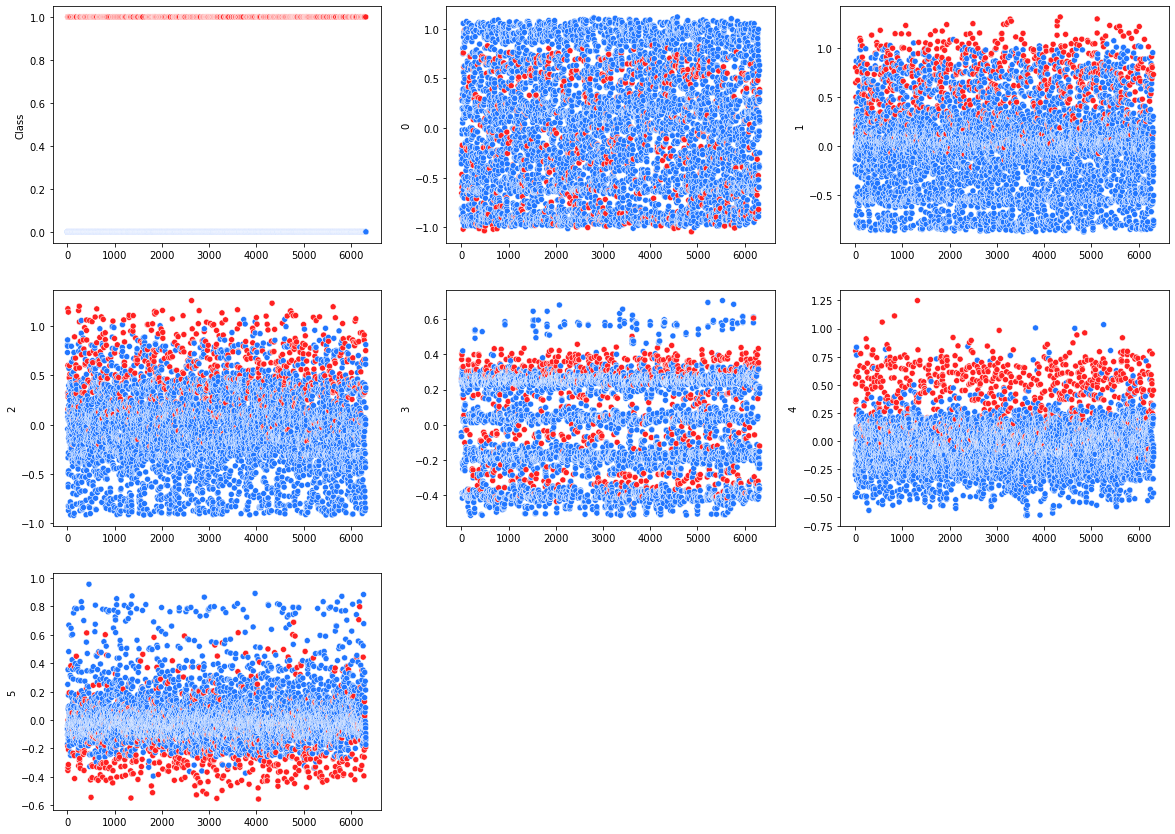

In [212]:
plt.figure(figsize=(20,20))
i = 0

columns = ['Class', 0,1,2,3,4,5]
for col in columns:
  i = i + 1
  plt.subplot(4, 3, i)
  colour = ['#ff2121' if y == 1 else '#2176ff' for y in pca_df.Class]
  sns.scatterplot(data = pca_df[col], legend=True, c=colour, edgecolors='#000000')

plt.show()

<font face = 'Cambria'><font size="+0.5">From comparing the scatter plot of our principal components to our original plot of the features, we can clearly see a great deal more separation between the classes. This is a good indication that this method is effective in maximising variance, and would be useful to prepare the data for use in classification algorithms.

By applying PCA we have also dimensionally reduced the data, from 9 components to 6. This reduction in input features will enable better performance of machine learning algorithms with less data. In a paper titled 'The Role of Dimensionality Reduction in Classification', the authors give two important ways by which dimensionality reduction can help reduce overfitting.

'(1) independent random noise, which is uncorrelated with the input and the label, and mostly perturbs points away from the data manifold. Simply running PCA, or other unsupervised DR algorithm, with an adequate number of components, can achieve this to some extent. (2) Unwanted degrees of freedom, which are possibly nonlinear, along which the input changes but the label does not. This more radical form of denoising requires the DR to be informed by the labels, of course, and is commonly called supervised DR.'(Wang and Carreira-Perpinan).

</font></h2>

<h2><font face = 'Cambria'>Linear Discriminant Analysis</font></h2>

<font face = 'Cambria'><font size="+0.5">We will now try a different dimensionality reduction technique on our bidding dataset, linear discriminant analysis (LDA). LDA performs dimensionality reduction by projecting input data to a linear axis as to maximise separation between the target classes. Linear discriminant analysis is more than a dimensionality reduction method, it is also a simple classification tool. We are going to explore both of these uses, and compare and contrast the results to those of principal component analysis. 

LDA takes two inputs, a set of observations (X) which will be our bidding dataset characteristics, and a classifying variable (Y) which will be our class column.</font></h2>

In [213]:
bidding_df

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,0.444444
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,0.444444
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,0.444444
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,0.444444
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0.666667
...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,0.222222
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,0.666667
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,0.666667
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,0.666667


In [214]:
Class

0       0
1       0
2       0
3       0
4       0
       ..
6316    1
6317    0
6318    0
6319    0
6320    0
Name: Class, Length: 6321, dtype: int64

<font face = 'Cambria'><font size="+0.5">As we did with PCA, we are going to implement LDA using the Scikit-learn Linear Discriminant Analysis module. To use our bidding data, we are going to convert our features and classes into NumPy arrays X and Y.</font></h2>

In [215]:
X = np.array(bidding_df)
Y = np.array(Class)

lda = LinearDiscriminantAnalysis()
bid_lda = lda.fit_transform(X, Y)

<font face = 'Cambria'><font size="+0.5">With our LDA model fit to our data, we can begin to explore the results. As with PCA we can look at the explained variance ratio of its outputs.</font></h2>

In [216]:
print(f'The explained variance ratio of LDA is {lda.explained_variance_ratio_}')

The explained variance ratio of LDA is [1.]


<font face = 'Cambria'><font size="+0.5">Here we can see the first big difference between LDA and PCA. Our LDA consists of one component that accounts for all of the variance. This is a result of our target being a binary classification. For K classes, LDA returns K-1 discriminant functions.

From a dimensionality reduction viewpoint, the LDA is a very strong method in that we have reduced 9 components down to 1. In the process however we have likely overfitted, and lost some of the signal in our data. This is a consequence of our target variable 'Class', being a binary classification variable. This is not the intended application for dimensionality reduction using LDA. From the Scikit Learn website:

'The dimension of the output is necessarily less than the number of classes, so this is in general a rather strong dimensionality reduction, and only makes sense in a multiclass setting.' (Scikit-learn).

From this result we can conclude that in a two-class setting like our bidding dataset, PCA is the more fitting dimensionality reduction technique. With our LDA fitted to the data, we can however now assess its effectiveness by looking at its other use as a classification method.

With our LDA function, we can save the result to a dataframe and reintroduce the class variable. We can then create a scatter plot of the results, with the classes highlighted by colour to look for clusters.</font></h2>

In [217]:
lda_df = pd.DataFrame(bid_lda, columns = ['LDA'])
lda_df['Class'] = Class
lda_df

,LDA,Class
0,-0.717181,0
1,-0.647310,0
2,-0.617970,0
3,-0.614382,0
4,-0.821493,0
...,...,...
6316,7.423197,1
6317,-0.643578,0
6318,-0.959846,0
6319,-0.937687,0


<AxesSubplot:ylabel='LDA'>

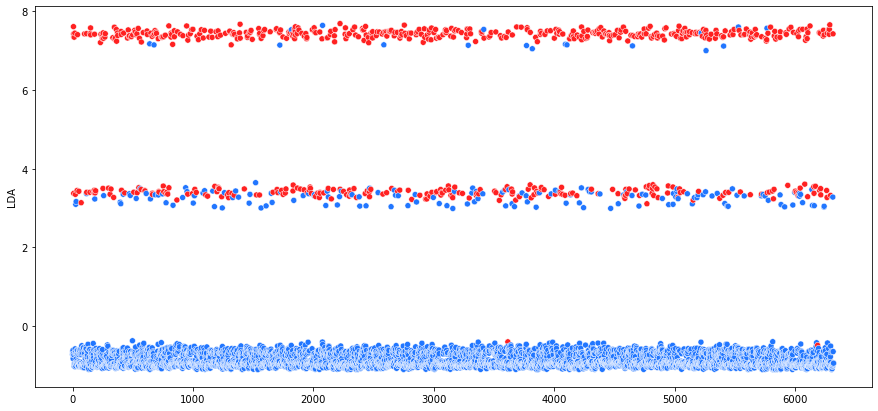

In [218]:
plt.figure(figsize=(15,7))
colour = ['#ff2121' if y == 1 else '#2176ff' for y in lda_df.Class]
sns.scatterplot(data = lda_df.LDA, c=colour)

<font face = 'Cambria'><font size="+0.5">From our plot we can see a clear separation between the classes, with two clusters of anomalous bids in the 2-4 range, and 6-8 range. This is a strong indication that our LDA function is effective at classifying our target Y. 

They are however not completely single class clusters. While the vast majority of normal bids are clustered in the < 0 range, there are some normal bids being found in the other two ranges also. We can measure the relative density of normal to anomalous bids in this ranges of our dataset by filtering the dataset according to these range conditions.</font></h2>

In [219]:
mask1 = lda_df.Class == 1
mask2 = lda_df.LDA > 2
lda_df.loc[mask1 & mask2]

,LDA,Class
7,7.606464,1
8,7.420232,1
9,3.373812,1
10,7.345804,1
13,7.338819,1
...,...,...
6284,7.412517,1
6285,7.539638,1
6289,7.652508,1
6295,3.321049,1


In [220]:
print(f'{len(lda_df.loc[mask1 & mask2])} out of {len(lda_df.loc[mask2])} ({round(len(lda_df.loc[mask1 & mask2]) / len(lda_df.loc[mask2]) * 100)}%) points with LDA coordinates above 2 are classes as anomalous.')

673 out of 843 (80%) points with LDA coordinates above 2 are classes as anomalous.


In [221]:
print(f'This cluster contains {round(len(lda_df.loc[mask1 & mask2]) / len(lda_df.loc[mask1]) * 100, 2)}% of all anomalous bids in the dataset.')

This cluster contains 99.7% of all anomalous bids in the dataset.


<font face = 'Cambria'><font size="+0.5">Filtering the dataset confirms the findings in our scatter plot, that 99.7% of all anomalous bids in the 2 and above range of LDA coordinates. If we assumed that any data point above 2 was anomalous, we would be correct with close to 80% accuracy. This is not too bad a result for a classifier based off only one dimension, the LDA coordinates.

We can further test this LDA classification technique creating a predictive model using our LDA function. Using the LDA coordinates as input, we can try and predict the class and compare it to the known class. To do so we will use the LDA predict method, and save the result to our LDA dataframe.</font></h2>

In [222]:
lda_predict = lda.predict(bidding_df)
lda_df['LDA_Class_Prediction'] = lda_predict
lda_df

,LDA,Class,LDA_Class_Prediction
0,-0.717181,0,0
1,-0.647310,0,0
2,-0.617970,0,0
3,-0.614382,0,0
4,-0.821493,0,0
...,...,...,...
6316,7.423197,1,1
6317,-0.643578,0,0
6318,-0.959846,0,0
6319,-0.937687,0,0


<font face = 'Cambria'><font size="+0.5">We can now compare the results of our class prediction based on our LDA, to the known classes by calculating the coefficient of determination between the two variables or R-squared. R-squared is the percent of variance explained by a regression model.</font></h2>

In [223]:
R_square = round(r2_score(lda_df.Class , lda_df.LDA_Class_Prediction), 2) 
print('The coefficient of determination is:', R_square)

The coefficient of determination is: 0.71


<h2><font face = 'Cambria'>Conclusions</font></h2>

<font face = 'Cambria'><font size="+0.5">As a simple classifier, LDA can make classifying predictions with 71% accuracy. As a dimensionality reduction technique, we were able to reduce the number of dimensions from 9 to 1, while retaining 71% of the variance. In contrast to PCA, we were able to capture 95% of the variance with 6 components. 

These two metrics are not precisely comparable, as principal component analysis is an unsupervised dimensionality reduction technique that ignores the class label. LDA on the other hand requires supervised labelling, to then find a feature subspace that maximises the separability between the labelled classes.

Each technique has different use cases, for this dataset principal component analysis followed by a classifying machine learning model would be the most effective at detecting anomalous bids on unseen data. We were able dimensionally reduce the data from 9-6 features, containing 95% of the variance. This would help reduce the amount of data required to train an effective model.

For dimensionality reduction, linear discriminant analysis is not the most suited technique to this dataset, as it is not a multiclass problem. As a classifier, LDA proved reasonably effective, but the result could likely be improved with a better classifying algorithm.</font></h2>